In [60]:
import pandas as pd

Index(['repeat_i', 'is_change_apply_to_test', 'classifier_name',
       'dataset_name', 'semantic_change', 'char_freq_range', 'test_acc',
       'test_f1', 'train_loss', 'test_loss', 'train_size', 'val_size',
       'test_size'],
      dtype='object')


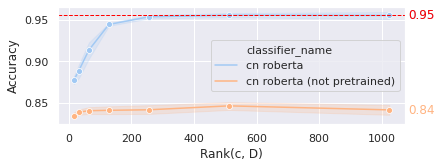

In [178]:
import pdb
import seaborn as sns
import matplotlib.pyplot as plt

# plot the trend when we changing only char freq

origin_df = pd.read_csv('../result/cn_novel_5billion_cn_roberta_None.csv')
pretrain_acc = origin_df[origin_df['char_freq_range'] == 0]['test_acc'].mean()
origin_df_non_pretrain = pd.read_csv('../result/cn_novel_5billion_cn_roberta_no_pretrain_None.csv')
origin_df = pd.concat([origin_df, origin_df_non_pretrain])

origin_df = origin_df[origin_df['char_freq_range'] != 0]
print(origin_df.keys())
# print(origin_df)
sns.set(rc={'figure.figsize':(6.4, 2.5)})


plot_df = {'char_freq_range': [], 'value': [], 'type': [], 'classifier_name': []}
for char_freq_range, char_freq_df in origin_df.groupby('char_freq_range'):
    plot_df['classifier_name'].extend(char_freq_df['classifier_name'].values)
    plot_df['value'].extend(char_freq_df['test_acc'].values)
    plot_df['type'].extend(['acc' for _ in char_freq_df['test_acc'].values])
    plot_df['char_freq_range'].extend([char_freq_range for _ in char_freq_df['test_acc'].values])

plot_df = pd.DataFrame(plot_df)


def tmp_func(x):
    if x == 'cn_roberta':
        return 'cn roberta'
    elif x == 'cn_roberta_no_pretrain':
        return 'cn roberta (not pretrained)'

plot_df['classifier_name'] = plot_df['classifier_name'].apply(tmp_func)


# ci = confidence interval
ax = sns.lineplot(data=plot_df, x="char_freq_range", y="value", marker="o", hue='classifier_name', palette = "pastel")
ax.axhline(pretrain_acc, ls='--', color='red', linewidth=1)
# ax.set_title("How eliminating chars based on frequency rank affects performance")
ax.set(xlabel='Rank(c, D)', ylabel='Accuracy')

annotate_lines = ax.lines
for l in annotate_lines:
    y = l.get_ydata()
    if len(y)>0:
        ax.annotate(f'{y[-1]:.2f}', xy=(1.01,y[-1]), xycoords=('axes fraction', 'data'), 
                     ha='left', va='center', color=l.get_color())
plt.tight_layout()
plt.savefig('exp_semantic_change_with_char_freq1.pdf')
plt.show()

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys
/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

['shuffle & deduplicate' 'shuffle & deduplicate' 'shuffle & deduplicate'
 'shuffle & deduplicate' 'shuffle & deduplicate' 'shuffle & deduplicate'
 'shuffle & deduplicate' 'shuffle & deduplicate' 'shuffle & deduplicate'
 'shuffle & deduplicate' 'shuffle & deduplicate' 'shuffle & deduplicate'
 'shuffle & deduplicate' 'shuffle & deduplicate' 'shuffle & deduplicate'
 'rank high2low' 'rank high2low' 'rank high2low' 'rank high2low'
 'rank high2low' 'rank high2low' 'rank high2low' 'rank high2low'
 'rank high2low' 'rank high2low' 'rank high2low' 'rank high2low'
 'rank high2low' 'rank high2low' 'rank high2low' 'deduplicate'
 'deduplicate' 'deduplicate' 'deduplicate' 'deduplicate' 'deduplicate'
 'deduplicate' 'deduplicate' 'deduplicate' 'deduplicate' 'deduplicate'
 'deduplicate' 'deduplicate' 'deduplicate' 'deduplicate' 'likelihood rank'
 'likelihood rank' 'likelihood rank' 'likelihood rank' 'likelihood rank'
 'likelihood rank' 'likelihood rank' 'likelihood rank' 'likelihood rank'
 'likelihood r

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


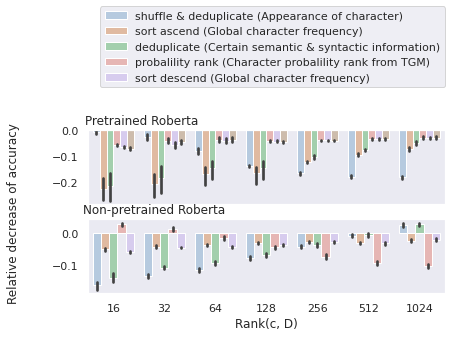

In [183]:
import os
import glob
import pdb
import copy

all_files = glob.glob(os.path.join('../result/', '*.csv'))
all_df = pd.concat([pd.read_csv(x) for x in all_files])
is_change_apply_to_test = True
# print(all_df['is_change_apply_to_test'])

sns.set(rc={'figure.figsize':(6.4, 4),'axes.grid' : False})

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6.4, 3), sharex=True)

classifier_name = 'cn_roberta_no_pretrain'
all_df = all_df[all_df['is_change_apply_to_test'] == is_change_apply_to_test]
all_df = all_df[~all_df['semantic_change'].isin({'rm_chars_out_freq', 'rm_chars_in_freq'})]

pretrain_df = all_df[all_df['classifier_name']=='cn_roberta']
no_pretrain_df = all_df[all_df['classifier_name']=='cn_roberta_no_pretrain']

print(other_df['semantic_change'].values)

pretrain_plot_df = {'char_freq_range': [], 
           'acc':[], 
           'origin_acc': [], 
           'relative_improve': [], 
           'type': [], 
           'semantic_change': []}
no_pretrain_plot_df = copy.deepcopy(pretrain_plot_df)

def rename_semantic_change(x):
    dict1 = {
             "['None']": 'origin',
             "['reorder_shuffle']": 'shuffle (In-sentence character frequency)',
             "['char_deduplicate']": 'deduplicate (Certain semantic & syntactic information)',
             "['reorder_freq_low2high']": 'sort descend (Global character frequency)',
             "['reorder_freq_high2low']": 'sort ascend (Global character frequency)',
             "['reorder_shuffle', 'char_deduplicate']": 'shuffle & deduplicate (Appearance of character)',
             "['likelihood_rank']":'probalility rank (Character probalility rank from TGM)'
            }
    return dict1[x]

pretrain_df['semantic_change'] = pretrain_df['semantic_change'].apply(rename_semantic_change)
no_pretrain_df['semantic_change'] = no_pretrain_df['semantic_change'].apply(rename_semantic_change)

def create_plot_df(src_df, target_df):
    for char_freq_range, char_freq_df in src_df.groupby('char_freq_range'):

        if char_freq_range == 0:
            continue

        origin_mask = (char_freq_df['char_freq_range'] == char_freq_range) & (
                    char_freq_df['semantic_change'] == "origin")
        origin_df = char_freq_df[origin_mask]
        other_df = char_freq_df[~origin_mask]

        for i, row in other_df.iterrows():
            test_acc = row['test_acc']
            semantic_change = row['semantic_change']
            repeat_i = row['repeat_i']
            origin_row_df = origin_df[origin_df['repeat_i'] == repeat_i]
            origin_acc = float(origin_row_df['test_acc'])

            relative_improve = test_acc - origin_acc

            target_df['char_freq_range'].append(char_freq_range)
            target_df['acc'].append(test_acc)
            target_df['origin_acc'].append(origin_acc)
            target_df['relative_improve'].append(relative_improve)
            target_df['type'].append('acc')
            target_df['semantic_change'].append(semantic_change)
    target_df = pd.DataFrame(target_df)
    return target_df

pretrain_plot_df = create_plot_df(pretrain_df, pretrain_plot_df)
no_pretrain_plot_df = create_plot_df(no_pretrain_df, no_pretrain_plot_df)

ax1 = sns.barplot(data=pretrain_plot_df, x="char_freq_range", y="relative_improve", hue="semantic_change", palette = "pastel", saturation=.5, ax=ax1)
ax1.get_legend().remove()
ax1.set_title("Pretrained Roberta", x=0.15)
ax1.set(xticklabels=[])
ax1.set(xlabel=None)
ax1.set(ylabel=None)
# ax1.set(xlabel='Rank(c, D)', ylabel='Relative decrease of accuracy')

ax2 = sns.barplot(data=no_pretrain_plot_df, x="char_freq_range", y="relative_improve", hue="semantic_change", palette = "pastel", saturation=.5, ax=ax2)
ax2.set_title("Non-pretrained Roberta", x=0.185)
# ax2.set(xlabel='Rank(c, D)', ylabel='Relative decrease of accuracy')
ax2.set(xlabel='Rank(c, D)')
ax2.set(ylabel=None)
fig.text(-0.05, 0.5, 'Relative decrease of accuracy', va='center', rotation='vertical')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
# change_width(ax, .12)

#ax.set_title("How semantic change of text affects accuracy")
plt.legend(bbox_to_anchor=(1.0, 2.78), loc=4, borderaxespad=0.0)
plt.tight_layout()
plt.savefig('exp_semantic_change_with_char_freq2.pdf')
plt.show()